In [1]:
from newsapi import NewsApiClient
import datetime as dt
import pandas as pd
from pandas import DataFrame
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
from collections import Counter
from nltk.stem import WordNetLemmatizer
import tweepy
from datetime import datetime




newsapi = NewsApiClient(api_key = '127ac9edf9da4a56bbce2c6ff98978c4')
pd.options.display.max_colwidth = 8000
lemmatizer = WordNetLemmatizer()

consumerKey = "jfAlL4ZYSvAcLZjIghNjkPVef"
consumerSecret = "E2Wd7Fc9kQhMC4x9bTbyo8IzyDOjH7gkgXc5ZzHKBv1na0JdCB"
accessToken = "1168827517387468800-sqEsr4vVHF4ZQ0BnfyFCqTaK4H17gr"
accessTokenSecret = "FTFWWelxrVTBlwfWsHSIMe4jKI5ikzkhdZ5QcsKuCNxUS"

authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
authenticate.set_access_token(accessToken, accessTokenSecret)

#calling api
api = tweepy.API(authenticate, wait_on_rate_limit = True)


In [2]:
# All the functions for NewsAPI 

#this is the list of sources that news API can scrapte the news from
# this is for the dropdown in UI that lets lisa choose the news source

def get_sources():
    sources = {'source':  ['associated-press', 'australian-financial-review', 'bbc-news' , 'bloomberg', 'breitbart-news', 'business-insider',
                       'cnn', 'cbc-news', 'financial-post', 'fortune', 'google-news-uk', 'reuters', 'the-huffington-post', 'the-wall-street-journal', 'the-washington-post', 
                        'time', 'usa-today' ] , 'source name':  ['Associated Press', 'Australian Financial Review', 'BBC News' , 'Bloomberg', 'Breitbart News', 'Business Insider', 
                       'CNN', 'CBC News ', 'Financial Post', 'Fortune', 'Google News UK', 'Reuters', 'The Huffington Post', 'The Wall Street Journal', 'The Washington Post', 
                        'Time', 'USA Today' ]}
    df = pd.DataFrame(sources, columns = ['source', 'source name' ])
    
    return df


def preprocessing (text):
    stopwords = nltk.corpus.stopwords.words('english')
    another = "idk,amp,&amp,aboard,about,above,accordance,back,according,across,after,against,ahead,along,alongside,also,although,amid,amidst,among,amongst,and,anent,anti,apart,around,as,aside,astride,at,athwart,atop,barring,because,before,behalf,behind,behither,below,beneath,beside,besides,between,betwixt,beyond,both,but,by,cum,despite,down,due,during,either,ere,even,except,far,following,for,fornenst,fornent,from,front,given,if,in,including,inside,instead,into,lest,lieu,like,means,near,neither,next,nor,notwithstanding,of,off,on,once,only,onto,or,out,outside,outwith,over,owing,per,point,prior,pro,qua,re,regard,regarding,regardless,regards,respect,sans,save,since,so,soon,subsequent,than,thanks,that,though,through,throughout,till,times,to,top,toward,towards,under,underneath,unless,unlike,until,unto,up,upon,versus,via,vice,vis-à-vis,well,when,whenever,where,wherever,whether,while,with,within,without,worth,yet,a,able,all,almost,am,an,any,are,aren't,arent,be,been,can,cannot,could,dear,did,didn't,didnt,do,don't,dont,does,doesn't,doesnt,else,ever,every,get,got,had,has,have,he,her,hers,him,his,how,however,i,is,it,its,just,least,let,likely,may,me,might,most,must,my,no,not,often,other,our,own,rather,said,say,says,she,should,shouldn't,shouldnt,some,the,their,them,then,there,these,they,this,tis,too,twas,us ,was,wasn't,wasnt,we,were,weren't,werent,what,which,who,whom,why,will,would,you,your,a's,accordingly,actually,afterwards,again,ain't,allow,allows,alone,already,always,another,anybody,anyhow,anyone,anything,anyway,anyways,anywhere,away,beforehand,being,c'mon,c's,came,can't,cant,co,com,come,comes,concerning,consequently,corresponding,couldn't,currently,definitely,described,doing,done,downwards,each,edu,eg,eight,elsewhere,enough,entirely,especially,et,etc,everybody,everyone,everything,everywhere,ex,exactly,example,few,fifth,first,five,followed,follows,former,formerly,forth,four,further,furthermore,gets,getting,gives,go,goes,going,gone,gotten,hadn't,happens,hardly,hasn't,haven't,having,he's,hello,help,hence,here,here's,hereafter,hereby,herein,hereupon,herself,hi,himself,hither,hopefully,howbeit,i'd,i'll,i'm,i've,ie,ignored,immediate,inasmuch,inc,indeed,insofar,inward,isn't,it'd,it'll,it's,itself,last,lately,later,latter,latterly,less,let's,liked,ltd,mainly,many,maybe,mean,meanwhile,merely,more,moreover,mostly,much,myself,name,namely,nd,nearly,need,needs,never,nevertheless,new,nine,nobody,non,none,noone,normally,nothing,now,nowhere,obviously,oh,ok,okay,old,one,ones,others,otherwise,ought,ours,ourselves,overall,perhaps,placed,please,possible,presumably,probably,provides,que,quite,qv,rd,really,reasonably,relatively,respectively,right,secondly,see,seeing,seem,seemed,seeming,seems,seen,self,selves,seriously,several,shall,somebody,somehow,someone,something,sometime,sometimes,somewhat,somewhere,sorry,still,sub,such,sup,t's,tends,th,thank,thanx,that's,thats,theirs,themselves,thence,there's,thereafter,thereby,therefore,therein,theres,thereupon,they'd,they'll,they're,they've,think,third,thorough,thoroughly,those,three,thru,thus,together,took,tried,tries,truly,try,trying,twice,two,un,unlikely,usually,very,viz,vs,want,way,we'd,we'll,we're,we've,welcome,went,what's,whatever,whence,where's,whereafter,whereas,whereby,wherein,whereupon,whither,who's,whoever,whole,whose,won't,wonder,wouldn't,yes,you'd,you'll,you're,you've,yours,yourself,yourselves,reuters,ap,e.g, etc, greetings,h,i.e.,inner,j,k,l,m,mr.,ms.,n,o,p,r,s,t,u,uucp,v,w,x,y,z,.com,.ly,.net,.org,aahh,aarrgghh,abt,ftl,ftw,fu,fuck,fucks,gtfo,gtg,haa,hah,hahah,haha,hahaha,hahahaha,hehe,heh,hehehe,hihi,hihihi,http,https,huge,huh,huhu,huhuhu,iirc,im,imho,imo,ini,irl,ish,isn,isnt,j/k,jk,jus,justwit,juz,kinda,kthx,kthxbai,kyou,laa,laaa,lah,lanuch,leavg,leh,lol,lols,mph,mrt,msg,msgs,muahahahahaha,nb,neways,ni,nice,pls,plz,plzz,psd,pte,pwm,pwned,qfmft,qft,tm,tmr,tyty,tyvm,um,umm,viv,vn,wa,wadever,wah,wasn,wassup,wat,watcha,wateva,watever,watnot,wats,wayy,wb,weren,whaha,wham,whammy,whaow,whatcha,whatev,whateva,whatevar,whatnot,whats,whatsoever,whatz,whee,whenz,whey,whore,whores,whoring,win,wo,woah,woh,wooohooo,woot,wow,wrt,wtb,wtf,wth,wts,wtt,www,xs,ya,yaah,yah,yahh,yahoocurrency,yall,yar,yay,yea,yeah,yeahh,yeh,yhoo,ymmv,youre,yr,yum,yummy,yumyum,yw,zomg,zz,zzz,loz,lor,loh,tsk,meh,lmao,wanna,doesn,liao,didn,omg,ohh,ohgod,hoh,hoo,bye,byee,byeee,byeeee,lmaolmao,yeahhh,yeahhhh,yeahhhhh,yup,yupp,hahahahahahaha,hahahahahah,hahhaha,wooohoooo,wahaha,haah,2moro,veh,noo,nooo,noooo,hahas,ooooo,ahahaha,ahahahahah,tomolow,ads,afaik,aft,ago,ain,aint,alot,anycase,anymore,app,apparently,apps,argh,ass,asses,babeh,bai,based,bcos,bcoz,bday,bit,biz,blah,bleh,bro,bros,btw,congrats,contd,conv,cos,couldn,couldnt,coz,crap,curnews,curr,cuz,dat,de,diff,dis,doc,don,dr,dreamt,drs,dun,dunno,duper,eh,ehh,emo,emos,eng,esp,fadein,ffs,fml,frm,fwah,g2g,gajshost,gd,geez,gg,gigs,hasn,hasnt,hav,haven,havent,hee,hey,hmm,ho,hohoho,info,issued,lawl,lfg,lfm,ll,lmfao,lnks,lotsa,lotta,luv,ly,macdailynews,neato,nite,nom,noscript,nvr,nw,ohayo,omfg,omfgwtf,omgwtfbbq,omw,org,pf,pic,pm,pmsing,ppl,pre,rawr,rawrr,rofl,roflmao,rss,rt,sec,secs,sgreinfo,shd,shit,shits,shitz,shld,shouldn,shudder,sq,sqft,sqm,srsly,stfu,stks,su,sux,swf,tat,tgif,thanky,thk,thks,tht,ttyl,ty,tym,tyme,typed,va,var,vc,ve,web,fucking,mrs,mr,ehhh,lot,lots,html,net,hahahahahahahahaha,hahahahaha,hahahahah,zzzzz,#teamfollowback,#teamfollow,#follow,#autofollow,#followgain,#followbackk,#teamautofollow,#followme,#ifollow,#followngain,#followback,#followfriday,#ifollowback,#200aday,#500aday,#1000aday,hahahahha,lolololol,lololol,lolol,dude,hmmm,humm,tumblr,kkkk,fk,yayyyyyy,fffffffuuuuuuuuuuuu,zzzz,noooooooooo,hahahhaha,woohoo,lalalalalalala,lala,lalala,lalalala,whahahaahahahahahah,gimme,gonna,gotta,grats,gratz,happen,happened,nowadays,phew,post,posted,posts,tweet,tweets,#ff,#f4f,#instantfollowback,#autofollowback,#instantfollow"
    additional = another.split(",")
    stopwords += additional 

    tokens = re.split('\W+', text)
    text = [lemmatizer.lemmatize(word) for word in tokens]
    result = [word for word in tokens if word not in stopwords]       
    return result



# retrieve the articles based on specified query and source, will return 15 results and the sentiment
def news_get_everything (query, source):
    
    data = newsapi.get_everything(q = query, sources = source, language = 'en', sort_by = 'relevancy' , page_size = 15) 
    df = pd.DataFrame(data['articles'])    
    df['clean_description'] =  df['description'].apply(lambda x: preprocessing(x.lower())) 
    
    for index, row in df.iterrows():
        published_at = row['publishedAt'].split('T')[0]
        row['publishedAt'] = published_at.replace("-", "/")
         
    
    senti_score = []
    result = []
    
    for index, row in df.iterrows():
        analyzer = SentimentIntensityAnalyzer()
        vs = analyzer.polarity_scores(row['description'])  # use description column to do sentiment analysis
        compound = vs.get('compound') 
        senti_score.append(compound) 
        
        if compound >= 0.05:
            result.append('Positive')
        elif compound <= -0.05:
            result.append('Negative')
        else:
            result.append('Neutral')    
            
    df['sentiment'] = result
    
    df['date'] = df['publishedAt']
   
    return df


def news_overallsentiment(df):
    

    postnews = df[df.sentiment == 'Positive']
    postnews = postnews['description']
    postnews

    negnews = df[df.sentiment == 'Negative']
    negnews = negnews['description']
    

    neunews = df[df.sentiment == 'Neutral']
    neunews = neunews['description']
    
    articles = {'Sentiment': ['Positive','Negative','Neutral'],
        'Overall Score': [round((postnews.shape[0] / df.shape[0]) *100, 1),round( (negnews.shape[0] / df.shape[0] * 100) , 1), round( (neunews.shape[0] / df.shape[0] * 100) , 1)]
        }
    df = pd.DataFrame(articles, columns = ['Sentiment', 'Overall Score'])
    
    
    return df

# for bar chart words and its count
def news_top_mentioned(df,query):
    word_list = []
    for index, rows in df.iterrows():
        for each_word in rows.clean_description:            
            if len(each_word) > 3 and each_word != query:      
                word_list.append(each_word)  

    counts = dict()
    for word in word_list:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1           

    df = pd.DataFrame(list(counts.items()),columns = ['word','count'])     
    df = df.sort_values(['count'], ascending=[False])[0:10]
   
    
    return df


# for wordcloud
def news_create_wordcloud(df, query):    
    word_list = []
    for index, rows in df.iterrows():
        for each_word in rows.clean_description:
            if len(each_word) > 3 and each_word != query:
                word_list.append(each_word)

    words_joined = " ".join([w for w in word_list])
    my_wordcloud = WordCloud(background_color='white', width=1800, height=1400).generate(words_joined)

    
    plt.imshow(my_wordcloud)    
    plt.axis('off')
    plt.show()
   


In [35]:
#All the functions for Twitter
#clean_txt function is for sentiment analysis. it only removes basic stop words

def partial_clean(text):  

    text = re.sub(r'RT[\s]+', '',  text) # removing RT
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyper link
    text = text.replace('\n','')

    return text



def clean_txt(text):
    
    text = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", text)  #remove mentions and url
    text = re.sub(r'RT[\s]+', '',  text) # removing the word 'RT'
    text = text.replace('\n','')
      
    return text




#clean_txt_list function is for topwords and wordcloud. It lemmatizes and removes a lot of stop words

def clean_txt_list(text):
    
    stopwords = nltk.corpus.stopwords.words('english')
    another = "idk,amp,&amp,aboard,kindly,about,above,accordance,according,across,magsafe,amp,twitter,back,after,against,ahead,along,alongside,also,although,amid,amidst,neck, use, uses, using, saying, says, said, among,amongst,and,anent,anti,apart,around,as,aside,astride,at,athwart,atop,barring,because,before,behalf,behind,behither,below,beneath,beside,besides,between,betwixt,beyond,both,but,by,cum,despite,down,due,during,either,ere,even,except,far,following,for,fornenst,fornent,from,front,given,if,in,including,inside,instead,into,lest,lieu,like,means,near,neither,next,nor,notwithstanding,of,off,on,once,only,onto,or,out,outside,outwith,over,owing,per,point,prior,pro,qua,re,regard,regarding,regardless,regards,respect,sans,save,since,so,soon,subsequent,than,thanks,that,though,through,throughout,till,times,to,top,toward,towards,under,underneath,unless,unlike,until,unto,up,upon,versus,via,vice,vis-à-vis,well,when,whenever,where,wherever,whether,while,with,within,without,worth,yet,a,able,all,almost,am,an,any,are,aren't,arent,be,been,can,cannot,could,dear,did,didn't,didnt,do,don't,dont,does,doesn't,doesnt,else,ever,every,get,got,had,has,have,he,her,hers,him,his,how,however,i,is,it,its,just,least,let,likely,may,me,might,most,must,my,no,not,often,other,our,own,rather,said,say,says,she,should,shouldn't,shouldnt,some,the,their,them,then,there,these,they,this,tis,too,twas,us ,was,wasn't,wasnt,we,were,weren't,werent,what,which,who,whom,why,will,would,you,your,a's,accordingly,actually,afterwards,again,ain't,allow,allows,alone,already,always,another,anybody,anyhow,anyone,anything,anyway,anyways,anywhere,away,beforehand,being,c'mon,c's,came,can't,cant,co,com,come,comes,concerning,consequently,corresponding,couldn't,currently,definitely,described,doing,done,downwards,each,edu,eg,eight,elsewhere,enough,entirely,especially,et,etc,everybody,everyone,everything,everywhere,ex,exactly,example,few,fifth,first,five,followed,follows,former,formerly,forth,four,further,furthermore,gets,getting,gives,go,goes,going,gone,gotten,hadn't,happens,hardly,hasn't,haven't,having,he's,hello,help,hence,here,here's,hereafter,hereby,herein,hereupon,herself,hi,himself,hither,hopefully,howbeit,i'd,i'll,i'm,i've,ie,ignored,immediate,inasmuch,inc,indeed,insofar,inward,isn't,it'd,it'll,it's,itself,last,lately,later,latter,latterly,less,let's,liked,ltd,mainly,many,maybe,mean,meanwhile,merely,more,moreover,mostly,much,myself,name,namely,nd,nearly,need,needs,never,nevertheless,new,nine,nobody,non,none,noone,normally,nothing,now,nowhere,obviously,oh,ok,okay,old,one,ones,others,otherwise,ought,ours,ourselves,overall,perhaps,placed,please,possible,presumably,probably,provides,que,quite,qv,rd,really,reasonably,relatively,respectively,right,secondly,see,seeing,seem,seemed,seeming,seems,seen,self,selves,seriously,several,shall,somebody,somehow,someone,something,sometime,sometimes,somewhat,somewhere,sorry,still,sub,such,sup,t's,tends,th,thank,thanx,that's,thats,theirs,themselves,thence,there's,thereafter,thereby,therefore,therein,theres,thereupon,they'd,they'll,they're,they've,think,third,thorough,thoroughly,those,three,thru,thus,together,took,tried,tries,truly,try,trying,twice,two,un,unlikely,usually,very,viz,vs,want,way,we'd,we'll,we're,we've,welcome,went,what's,whatever,whence,where's,whereafter,whereas,whereby,wherein,whereupon,whither,who's,whoever,whole,whose,won't,wonder,wouldn't,yes,you'd,you'll,you're,you've,yours,yourself,yourselves,reuters,ap,e.g, etc, greetings,h,i.e.,inner,j,k,l,m,mr.,ms.,n,o,p,r,s,t,u,uucp,v,w,x,y,z,.com,.ly,.net,.org,aahh,aarrgghh,abt,ftl,ftw,fu,fuck,fucks,gtfo,gtg,haa,hah,hahah,haha,hahaha,hahahaha,hehe,heh,hehehe,hihi,hihihi,http,https,huge,huh,huhu,huhuhu,iirc,im,imho,imo,ini,irl,ish,isn,isnt,j/k,jk,jus,justwit,juz,kinda,kthx,kthxbai,kyou,laa,laaa,lah,lanuch,leavg,leh,lol,lols,mph,mrt,msg,msgs,muahahahahaha,nb,neways,ni,nice,pls,plz,plzz,psd,pte,pwm,pwned,qfmft,qft,tm,tmr,tyty,tyvm,um,umm,viv,vn,wa,wadever,wah,wasn,wassup,wat,watcha,wateva,watever,watnot,wats,wayy,wb,weren,whaha,wham,whammy,whaow,whatcha,whatev,whateva,whatevar,whatnot,whats,whatsoever,whatz,whee,whenz,whey,whore,whores,whoring,win,wo,woah,woh,wooohooo,woot,wow,wrt,wtb,wtf,wth,wts,wtt,www,xs,ya,yaah,yah,yahh,yahoocurrency,yall,yar,yay,yea,yeah,yeahh,yeh,yhoo,ymmv,youre,yr,yum,yummy,yumyum,yw,zomg,zz,zzz,loz,lor,loh,tsk,meh,lmao,wanna,doesn,liao,didn,omg,ohh,ohgod,hoh,hoo,bye,byee,byeee,byeeee,lmaolmao,yeahhh,yeahhhh,yeahhhhh,yup,yupp,hahahahahahaha,hahahahahah,hahhaha,wooohoooo,wahaha,haah,2moro,veh,noo,nooo,noooo,hahas,ooooo,ahahaha,ahahahahah,tomolow,ads,afaik,aft,ago,ain,aint,alot,anycase,anymore,app,apparently,apps,argh,ass,asses,babeh,bai,based,bcos,bcoz,bday,bit,biz,blah,bleh,bro,bros,btw,congrats,contd,conv,cos,couldn,couldnt,coz,crap,curnews,curr,cuz,dat,de,diff,dis,doc,don,dr,dreamt,drs,dun,dunno,duper,eh,ehh,emo,emos,eng,esp,fadein,ffs,fml,frm,fwah,g2g,gajshost,gd,geez,gg,gigs,hasn,hasnt,hav,haven,havent,hee,hey,hmm,ho,hohoho,info,issued,lawl,lfg,lfm,ll,lmfao,lnks,lotsa,lotta,luv,ly,macdailynews,neato,nite,nom,noscript,nvr,nw,ohayo,omfg,omfgwtf,omgwtfbbq,omw,org,pf,pic,pm,pmsing,ppl,pre,rawr,rawrr,rofl,roflmao,rss,rt,sec,secs,sgreinfo,shd,shit,shits,shitz,shld,shouldn,shudder,sq,sqft,sqm,srsly,stfu,stks,su,sux,swf,tat,tgif,thanky,thk,thks,tht,ttyl,ty,tym,tyme,typed,va,var,vc,ve,web,fucking,mrs,mr,ehhh,lot,lots,html,net,hahahahahahahahaha,hahahahaha,hahahahah,zzzzz,#teamfollowback,#teamfollow,#follow,#autofollow,#followgain,#followbackk,#teamautofollow,#followme,#ifollow,#followngain,#followback,#followfriday,#ifollowback,#200aday,#500aday,#1000aday,hahahahha,lolololol,lololol,lolol,dude,hmmm,humm,tumblr,kkkk,fk,yayyyyyy,fffffffuuuuuuuuuuuu,zzzz,noooooooooo,hahahhaha,woohoo,lalalalalalala,lala,lalala,lalalala,whahahaahahahahahah,gimme,gonna,gotta,grats,gratz,happen,happened,nowadays,phew,post,posted,posts,tweet,tweets,#ff,#f4f,#instantfollowback,#autofollowback,#instantfollow"
    additional = another.split(",")
    stopwords += additional 
   
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #removed @mentions
    text = re.sub(r'#', '', text) #removing the # symbols
    text = re.sub(r'RT[\s]+', '',  text) # removing RT
    text = re.sub(r'\n[\s]+', '',  text) # removing \n
    text = ''.join([i for i in text if not i.isdigit()]) #removing digits
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyper link
    text = text.lower() # lowercase
    text =  ' '.join(word.strip(string.punctuation) for word in text.split()) #remove punctuations
    tokens = re.split('\W+', text)
    text = [lemmatizer.lemmatize(word) for word in tokens]
    text = [word for word in text if word not in stopwords] #remove stopwords 

    
    return text    
    
# to retrive tweets from twitter api
def tweet_search(query, resulttype):
    
    tweets_search = tweepy.Cursor(api.search, q = query, lang = 'en' , result_type = resulttype, tweet_mode='extended').items(15)
    tweets_list = []
    url_list = []
    date_list = []


    for tweet in tweets_search:
        tweets_list.append(tweet.full_text) 
        date = tweet.created_at.strftime("%Y/%m/%d")
        date_list.append(date)        
        url = f"https://twitter.com/{tweet.user.screen_name}/status/{tweet.id}"
        url_list.append(url)     

    data = {'Tweets': tweets_list, 'URL': url_list, 'Date': date_list}

    df = pd.DataFrame(data) 
    
    df['Tweets'] = df['Tweets'].apply(partial_clean)
    df['Cleaned'] = df['Tweets'].apply(clean_txt)
    df['CleanedList'] = df['Tweets'].apply(clean_txt_list)
    
    senti_score = []    
    result = []
    for index, row in df.iterrows():
        analyzer = SentimentIntensityAnalyzer()
        vs = analyzer.polarity_scores(row['Cleaned'])  
        compound = vs.get('compound')         
        senti_score.append(compound)  
        
        if compound >= 0.05:
            result.append('Positive')
        elif compound <= -0.05:
            result.append('Negative')
        else:
            result.append('Neutral')    

  
    df['Sentiment'] = result     


    return df



# for bar chart and its count
def twt_top_mentioned(df,query):
    word_list = []
    for index, rows in df.iterrows():
        for each_word in rows.CleanedList:
            if len(each_word) > 3 and each_word != query:
                    word_list.append(each_word)   
    
    counts = dict()
    for word in word_list:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1           

    df = pd.DataFrame(list(counts.items()),columns = ['word','count'])     
    df = df.sort_values(['count'], ascending=[False])[0:10]  
    
    return df


def twt_overallsentiment(df):
    
    #get the percentage of positive tweets
    postweets = df[df.Sentiment == 'Positive']
    postweets = postweets['Cleaned']
    
    # get the percentage of negative tweets
    negtweets = df[df.Sentiment == 'Negative']
    negtweets = negtweets['Cleaned']
    
    #get the percentage of neutral tweets
    neutweets = df[df.Sentiment == 'Neutral']
    neutweets = neutweets['Cleaned']
    
    tweets = {'Sentiment': ['Positive','Negative','Neutral'],
        'Overall Score': [round((postweets.shape[0] / df.shape[0]) *100, 1),round( (negtweets.shape[0] / df.shape[0] * 100) , 1), round( (neutweets.shape[0] / df.shape[0] * 100) , 1)]
        }
    df = pd.DataFrame(tweets, columns = ['Sentiment', 'Overall Score'])
    
    
    return df

def twt_create_wordcloud(df,query):    
    word_list = []
    for index, rows in df.iterrows():
        for each_word in rows.CleanedList:
            if  len(each_word) > 3 and each_word != query:
                word_list.append(each_word)

                
    words_joined = " ".join([w for w in word_list])
    my_wordcloud = WordCloud(background_color='white', width=1800, height=1400).generate(words_joined)
    
    plt.imshow(my_wordcloud)    
    plt.axis('off')
    plt.show()  

    
def time_series(query):  

    tweets_search = tweepy.Cursor(api.search, q = query, result_type = 'recent', lang = 'en' , tweet_mode='extended').items(100)    

    tweets_list = []
    date_time = []

    for tweet in tweets_search:
        tweets_list.append(tweet.full_text) 
        date_time.append(tweet.created_at)

    data = {'Tweets': tweets_list,  'Date_Time': date_time}
    df = pd.DataFrame(data) 
          

    df['Cleaned'] = df['Tweets'].apply(clean_txt)

    
    senti_score = []    
    for index, row in df.iterrows():
        analyzer = SentimentIntensityAnalyzer()
        vs = analyzer.polarity_scores(row['Cleaned'])  
        compound = vs.get('compound')         
        senti_score.append(round(compound,2))          
  
    df['Sentiment'] = senti_score   

    df_sampled = df.set_index('Date_Time').resample('5S').mean().reset_index()
    df_sampled['Sentiment'] = df_sampled['Sentiment'].fillna(0)
    df_sampled['Date_Time'] = df_sampled['Date_Time'].dt.time
    
    return df_sampled
    

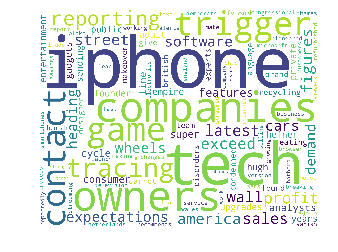

In [18]:

temp_df = news_get_everything('apple' , 'bbc-news')  #always call this very basic dataframe first

# below are the 5 data frames Harvey needs

df_source = get_sources()
df_selected = temp_df[['title', 'url', 'urlToImage', 'sentiment', 'description','date']][0:5] # for table
df_topword = news_top_mentioned(temp_df, 'apple') #  for bar chart
news_create_wordcloud(temp_df, 'apple')  # for wordcloud
df_overallsent = news_overallsentiment(df_selected)   # for pie chart


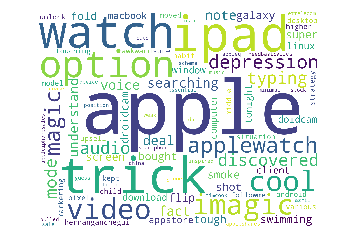

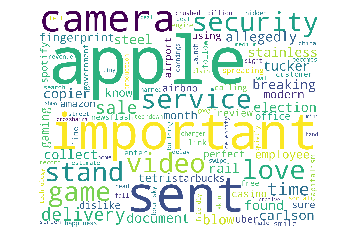

In [36]:
temp_recent = tweet_search('iphone', 'recent')   # always call this basic data frame first
temp_pop = tweet_search('iphone', 'popular')     #always call this basic data frame first


# Below are 8 data frames Harvey needs

tweets_recent = temp_recent[['Tweets', 'Sentiment', 'URL', 'Date']][0:5]    # for table - recent tweets, sentiment, URL and Date
tweets_pop =  temp_pop[['Tweets', 'Sentiment','URL', 'Date']][0:5]        # for table - popular tweets, sentiment, URL and Date



topword_recent = twt_top_mentioned(temp_recent, 'iphone') # for bar chart recent
topword_pop = twt_top_mentioned(temp_pop, 'iphone')  # for bar chart popular

overall_sent_recent= twt_overallsentiment(temp_recent)   # for pie chart recent
overall_sent_pop = twt_overallsentiment(temp_pop)   # for pie chart popular


twt_create_wordcloud(temp_recent,'iphone')  #word cloud recent
twt_create_wordcloud(temp_pop, 'iphone')  # word cloud popular


df_timeseries = time_series('iphone')


In [20]:
df_source

,source,source name
0,associated-press,Associated Press
1,australian-financial-review,Australian Financial Review
2,bbc-news,BBC News
3,bloomberg,Bloomberg
4,breitbart-news,Breitbart News
5,business-insider,Business Insider
6,cnn,CNN
7,cbc-news,CBC News
8,financial-post,Financial Post
9,fortune,Fortune


In [21]:
df_selected

,title,url,urlToImage,sentiment,description,date
0,"For Amazon, Apple, Facebook and Google business is booming",https://www.bbc.co.uk/news/business-54741689,https://ichef.bbci.co.uk/news/1024/branded_news/8555/production/_115133143_hi064084810.jpg,Positive,Latest sales and profit figures from America's big tech companies exceed Wall Street expectations.,2020/10/29
1,Carmakers compete to keep you entertained,https://www.bbc.co.uk/news/business-54336423,https://ichef.bbci.co.uk/news/1024/branded_news/0D47/production/_114699330_gettyimages-1198592316.jpg,Negative,"Cars are not software on wheels yet, but the tech is heading that way as owners demand more features.",2020/10/08
2,iPhone 12: Apple makes jump to 5G,https://www.bbc.co.uk/news/technology-54510361,https://ichef.bbci.co.uk/news/1024/branded_news/D4B1/production/_114894445_braodimage.png,Neutral,"Analysts say the new iPhone line-up could trigger a ""super-cycle"" of consumer upgrades.",2020/10/13
3,Playboy goes from private to public in new venture,https://www.bbc.co.uk/news/business-54381937,https://ichef.bbci.co.uk/news/1024/branded_news/0E76/production/_114720730_gettyimages-914010152.jpg,Positive,The adult entertainment empire is to go public again nine years after founder Hugh Hefner took it private,2020/10/02
4,Apple sues recycling firm that 'resold old gadgets',https://www.bbc.co.uk/news/technology-54419309,https://ichef.bbci.co.uk/news/1024/branded_news/1632F/production/_114772909_gettyimages-455053466.jpg,Neutral,"After sending 500,000 gadgets for recycling, Apple says it found more than 100,000 were still in use.",2020/10/05


In [22]:
df_topword

,word,count
89,tracing,2
6,companies,2
15,owners,2
21,trigger,2
90,reporting,2
19,iphone,2
5,tech,2
88,contact,2
82,customers,1
81,business,1


In [23]:
df_overallsent

,Sentiment,Overall Score
0,Positive,40.0
1,Negative,20.0
2,Neutral,40.0


In [24]:
tweets_recent

,Tweets,Sentiment,URL,Date
0,Air pollution in China due to iPhone 12,Neutral,https://twitter.com/Geekrar/status/1322039914037448704,2020/10/30
1,Now Playing Dewey Da Don - What it feel like right Now on #trackbullysradio Download the Track Bullys Radio app on Android or Iphone Now,Positive,https://twitter.com/TRACKBULLYS/status/1322039887252566018,2020/10/30
2,@MKBHD: NEW VIDEO - iPhone 12 Pro Review: You Sure About That?,Positive,https://twitter.com/manav10799/status/1322039885268570114,2020/10/30
3,@official_jensoo: Jennie and iphone selfies 🤳🏻😂 She posted back @BLACKPINK,Positive,https://twitter.com/melovesjen/status/1322039873973280769,2020/10/30
4,@MKBHD: iPhone 12 Pro’s stainless steel rails collect more fingerprints than the CSI employee of the month,Neutral,https://twitter.com/redefined__life/status/1322039869145673728,2020/10/30


In [25]:
tweets_pop

,Tweets,Sentiment,URL,Date
0,"BREAKING: Documents Tucker Carlson never actually had that would allegedly blow up the election were so important that they were sent via DHL, and now can’t be found despite copiers, iPhone cameras and security cameras. 😂😂😂",Positive,https://twitter.com/shannonrwatts/status/1321619695980732422,2020/10/29
1,iPhone 12 Pro’s stainless steel rails collect more fingerprints than the CSI employee of the month,Neutral,https://twitter.com/MKBHD/status/1322000480310980608,2020/10/30
2,Everything you need to know about modern gaming via Tetris for iPhone.A perfect game that fit on a 32kb Game Boy ROM is now a 431mb casino.,Positive,https://twitter.com/sandofsky/status/1321593104298725376,2020/10/28
3,NEW VIDEO - iPhone 12 Pro Review: You Sure About That?,Positive,https://twitter.com/MKBHD/status/1322021657662423041,2020/10/30
4,"Do you love Starbucks, Amazon, Airbnb, Uber, the iPhone, and using Spotify?Do you dislike going to the DMV and the post office, going through airport security, or calling the IRS customer service line?NEWSFLASH: You love capitalism and can't stand Big Government!",Positive,https://twitter.com/prageru/status/1321942427490381824,2020/10/29


In [26]:
topword_recent

,word,count
23,month,4
22,employee,4
21,fingerprint,4
20,collect,4
19,rail,4
18,steel,4
17,stainless,4
10,android,2
0,pollution,1
34,stabilization,1


In [27]:
topword_pop

,word,count
56,apple,4
46,stand,2
27,video,2
67,sale,2
25,game,2
12,security,2
11,camera,2
42,service,2
50,delivery,2
8,sent,2


In [28]:
overall_sent_recent

,Sentiment,Overall Score
0,Positive,33.3
1,Negative,13.3
2,Neutral,53.3


In [29]:
overall_sent_pop

,Sentiment,Overall Score
0,Positive,40.0
1,Negative,33.3
2,Neutral,26.7


In [37]:
df_timeseries

,Date_Time,Sentiment
0,04:58:05,0.730000
1,04:58:10,0.373333
2,04:58:15,0.046250
3,04:58:20,0.000000
4,04:58:25,-0.313333
5,04:58:30,-0.113333
6,04:58:35,0.000000
7,04:58:40,0.160000
8,04:58:45,0.000000
9,04:58:50,0.000000


In [20]:
df_test = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')
df_test


,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
0,2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400,122.905254,106.741052,117.927667,129.114281,Increasing
1,2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700,123.760965,107.842423,118.940333,130.038244,Increasing
2,2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400,123.501363,108.894245,119.889167,130.884089,Decreasing
3,2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400,124.510914,109.785449,120.763500,131.741551,Increasing
4,2015-02-23,130.020004,133.000000,129.660004,133.000000,70974100,127.876074,110.372516,121.720167,133.067817,Increasing
...,...,...,...,...,...,...,...,...,...,...,...
501,2017-02-10,132.460007,132.940002,132.050003,132.119995,20065500,132.119995,114.494004,124.498666,134.503328,Decreasing
502,2017-02-13,133.080002,133.820007,132.750000,133.289993,23035400,133.289993,114.820798,125.205166,135.589534,Increasing
503,2017-02-14,133.470001,135.089996,133.250000,135.020004,32815500,135.020004,115.175718,125.953499,136.731280,Increasing
504,2017-02-15,135.520004,136.270004,134.619995,135.509995,35501600,135.509995,115.545035,126.723499,137.901963,Decreasing


In [21]:
df_timeseries = time_series('stock')
df_timeseries

,Date_Time,Sentiment
0,15:00:25,0.250000
1,15:00:30,0.019167
2,15:00:35,-0.106667
3,15:00:40,0.149091
4,15:00:45,0.098667
5,15:00:50,0.206364
6,15:00:55,0.063846
7,15:01:00,0.063077
8,15:01:05,0.068571
